In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from muxcnn.utils import *
from muxcnn.hecnn_par import *
from muxcnn.comparator import ApprRelu
from icecream import ic
import torch
import torch.nn.functional as F

## Torch model

In [3]:
from muxcnn.models.ResNet20 import ResNet, BasicBlock

activation = F.relu

model = ResNet(BasicBlock,[1,1,1])
model.eval() ########## 필수! 
load_params(model, fn_param="./ResNet8.pt",device='cpu')

In [4]:
model

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
      (shortcut): Sequential()
    )
  )
  (layer2): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
      (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(32, e

In [5]:
img_tensor = load_img("./cute.jpg", hi=32, wi=32)

1. Pytorch 모델 순서대로 풀기 
2. Downsampling 역할 확실히 
3. AVG Pool 적용
4. FC 적용
5. Activation 적용
6. 완성
7. Simulator로 변환
8. HEAAN으로 변환 

In [13]:
out, smaxed = forward(model, img_tensor, do_activation=True)

after BN tensor(-5.1674, grad_fn=<MinBackward1>) tensor(6.1957, grad_fn=<MaxBackward1>)
after BN tensor(-6.9089, grad_fn=<MinBackward1>) tensor(4.9942, grad_fn=<MaxBackward1>)
after BN tensor(-6.3457, grad_fn=<MinBackward1>) tensor(7.9678, grad_fn=<MaxBackward1>)
after BN tensor(-5.7823, grad_fn=<MinBackward1>) tensor(5.7063, grad_fn=<MaxBackward1>)
after BN tensor(-8.9524, grad_fn=<MinBackward1>) tensor(6.3666, grad_fn=<MaxBackward1>)
after BN tensor(-4.8953, grad_fn=<MinBackward1>) tensor(4.2816, grad_fn=<MaxBackward1>)
after BN tensor(-4.5479, grad_fn=<MinBackward1>) tensor(6.0798, grad_fn=<MaxBackward1>)


In [6]:
print(model(img_tensor))

tensor([[-1.3450e+01, -1.5208e+01, -7.1236e+00, -7.0674e+00, -1.3500e+01,
         -2.0791e-03, -1.1022e+01, -7.8494e+00, -1.3094e+01, -1.1840e+01]],
       grad_fn=<LogSoftmaxBackward0>)


In [12]:
img_tensor.max()

tensor(1.)

# Activation

In [8]:
from muxcnn.comparator import appr_relu
#xin = np.linspace(-19, 19, 100000)
#rappx = appr_relu(xin, xmin=-20, xmax=20, alpha=12)

In [15]:
smaxed

array([[-1.3449995e+01, -1.5208085e+01, -7.1236320e+00, -7.0673981e+00,
        -1.3499517e+01, -2.0791122e-03, -1.1021677e+01, -7.8493834e+00,
        -1.3094085e+01, -1.1839599e+01]], dtype=float32)

In [16]:
model(img_tensor)

tensor([[-1.3450e+01, -1.5208e+01, -7.1236e+00, -7.0674e+00, -1.3500e+01,
         -2.0791e-03, -1.1022e+01, -7.8494e+00, -1.3094e+01, -1.1840e+01]],
       grad_fn=<LogSoftmaxBackward0>)

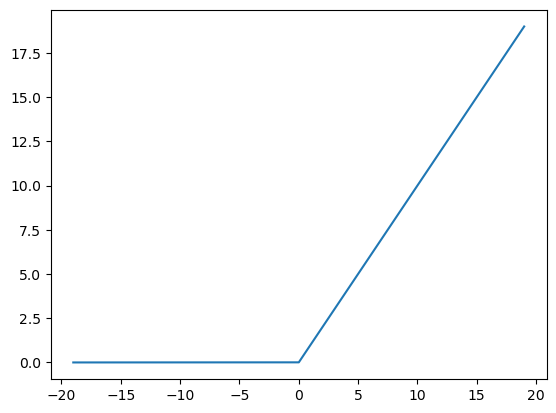

In [68]:
plt.plot(xin, rappx)
#xin[xin<0] = 0
#plt.plot(xin)

#plt.plot(relu - rappx)

## Activation auto scaling

In [9]:
from muxcnn.resnet_fhe import ResNetFHE

In [10]:
fhe_model = ResNetFHE(model, alpha=12)

functions set
degrees = [15, 15, 15, 15], margin = 0.01, eps = 0.02


In [11]:
result = fhe_model(img_tensor)

[MultParConv] (hi,wi,ci,ki,ti,pi) =(32,32, 3, 1, 3,  8)
[MultParConv] (ho,wo,co,ko,to,po) =(32,32,16, 1,16,  2)
[MultParConv] q = 2
[MultParConv] (hi,wi,ci,ki,ti,pi) =(32,32,16, 1,16,  2)
[MultParConv] (ho,wo,co,ko,to,po) =(32,32,16, 1,16,  2)
[MultParConv] q = 8
[MultParConv] (hi,wi,ci,ki,ti,pi) =(32,32,16, 1,16,  2)
[MultParConv] (ho,wo,co,ko,to,po) =(32,32,16, 1,16,  2)
[MultParConv] q = 8
[MultParConv] (hi,wi,ci,ki,ti,pi) =(32,32,16, 1,16,  2)
[MultParConv] (ho,wo,co,ko,to,po) =(16,16,32, 2, 8,  4)
[MultParConv] q = 16
[MultParConv] (hi,wi,ci,ki,ti,pi) =(16,16,32, 2, 8,  4)
[MultParConv] (ho,wo,co,ko,to,po) =(16,16,32, 2, 8,  4)
[MultParConv] q = 8
[MultParConv] (hi,wi,ci,ki,ti,pi) =(32,32,16, 1,16,  2)
[MultParConv] (ho,wo,co,ko,to,po) =(16,16,32, 2, 8,  4)
[MultParConv] q = 16
[MultParConv] (hi,wi,ci,ki,ti,pi) =(16,16,32, 2, 8,  4)
[MultParConv] (ho,wo,co,ko,to,po) =( 8, 8,64, 4, 4,  8)
[MultParConv] q = 16
[MultParConv] (hi,wi,ci,ki,ti,pi) =( 8, 8,64, 4, 4,  8)
[MultParConv] (ho

In [19]:
F.log_softmax(torch.tensor(result[::64][:10]))

/tmp/ipykernel_70355/833395615.py:1: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  F.log_softmax(torch.tensor(result[::64][:10]))


tensor([-1.3598e+01, -1.5145e+01, -7.4333e+00, -7.2324e+00, -1.3791e+01,
        -1.7128e-03, -1.1305e+01, -7.8917e+00, -1.3214e+01, -1.1893e+01],
       dtype=torch.float64)

In [71]:
do_activation = True

res1_ = model.conv1(img_tensor)
res1 = model.bn1(res1_)
if do_activation: res1 = model.activation(res1)

### basicblock1 (no striding)
res2_ = model.layer1[0].conv1(res1)
res2 = model.layer1[0].bn1(res2_)
if do_activation: res2 = model.activation(res2)

res3_ = model.layer1[0].conv2(res2)
res3 = model.layer1[0].bn2(res3_)
res3 += res1 # simply add
if do_activation: res3 = model.activation(res3)

#### basicblock2
res4_ = model.layer2[0].conv1(res3)
res4 = model.layer2[0].bn1(res4_)
if do_activation: res4 = model.activation(res4)

res5_ = model.layer2[0].conv2(res4)
res5 = model.layer2[0].bn2(res5_)

# basicblock2 - shortcut
sc1_conv1, sc1_bn1 = model.layer2[0].shortcut
sc1 = sc1_bn1(sc1_conv1(res3))
res5 += sc1
if do_activation: res5 = model.activation(res5)

#### basicblock3
res6_ = model.layer3[0].conv1(res5)
res6 = model.layer3[0].bn1(res6_)
if do_activation: res6 = model.activation(res6)

res7_ = model.layer3[0].conv2(res6)
res7_ = model.layer3[0].bn2(res7_)

# basicblock3 - shortcut
sc2_conv1, sc2_bn1 = model.layer3[0].shortcut
sc2 = sc2_bn1(sc2_conv1(res5))
res7 = res7_ +sc2
if do_activation: res7 = model.activation(res7)

# terminal
res_avg = model.avgpool(res7)
res_flat = torch.flatten(res_avg, 1)
res_linear = model.linear(res_flat)
res_softmax = F.log_softmax(res_linear, dim=1)

res_linear.detach().numpy(), res_softmax.detach().numpy()


(array([[ -9.3004675, -11.0585575,  -2.9741044,  -2.9178703,  -9.34999  ,
           4.1474485,  -6.872149 ,  -3.6998558,  -8.944557 ,  -7.690071 ]],
       dtype=float32),
 array([[-1.3449995e+01, -1.5208085e+01, -7.1236320e+00, -7.0673981e+00,
         -1.3499517e+01, -2.0791122e-03, -1.1021677e+01, -7.8493834e+00,
         -1.3094085e+01, -1.1839599e+01]], dtype=float32))

# FHE

In [10]:
from muxcnn.models import ResNet20



In [147]:
ctxt = AVGPool(ctxt, outs3, nslots)
result = forward_linear(ctxt, model.linear)

In [148]:
result

array([ -9.26779364, -10.59266017, -10.51080964, ...,  -9.02272839,
        -8.92453475,  -9.06375378])

In [14]:
result = forward(model, img_tensor)

functions set
degrees = [15, 15, 15, 15], margin = 0.01, eps = 0.02
[MultParConv] (hi,wi,ci,ki,ti,pi) =(32,32, 3, 1, 3,  8)
[MultParConv] (ho,wo,co,ko,to,po) =(32,32,16, 1,16,  2)
[MultParConv] q = 2
[MultParConv] (hi,wi,ci,ki,ti,pi) =(32,32,16, 1,16,  2)
[MultParConv] (ho,wo,co,ko,to,po) =(32,32,16, 1,16,  2)
[MultParConv] q = 8


NameError: name 'apr_relu' is not defined

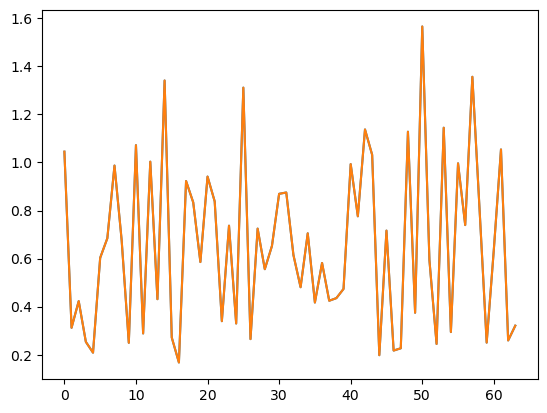

In [139]:
flattened = AVGPool(ctxt, outs3, nslots)

plt.plot(flattened[:64])
plt.plot(res_flat[0].detach().numpy())

In [72]:
nslots = 2**15

imgl = get_channel_last(img_tensor[0].detach().numpy())
ki = 1
hi, wi, ch = imgl.shape


U, ins1, outs1 = get_conv_params(model.conv1, {'k':ki, 'h':hi, 'w':wi})
ct_a = MultParPack(imgl, ins1)
out1, un1 = forward_convbn_par(model.conv1, 
                              model.bn1, ct_a, ins1)
if do_activation:
    out1 = appr_relu(out1, xmin=-10, xmax=10, alpha=12)


    
    
    
    
    U, ins2, outs2 = get_conv_params(model.layer1[0].conv1, outs1)
out2, un2 = forward_convbn_par(model.layer1[0].conv1,
                              model.layer1[0].bn1, out1, ins2)
if do_activation:
    out2 = appr_relu(out2, xmin=-10, xmax=10, alpha=12)

U, ins3, outs3 = get_conv_params(model.layer1[0].conv2, outs2)
out3, un3 = forward_convbn_par(model.layer1[0].conv2,
                              model.layer1[0].bn2, out2, ins3)

out3 += out1 # No downsampling

if do_activation:
    out3 = appr_relu(out3, xmin=-10, xmax=10, alpha=12)

un3_sc = unpack(out3, outs3)
compare(res3, un3_sc, ch=7, fn="layer3_with_shortcut.png")


[MultParConv] (hi,wi,ci,ki,ti,pi) =(32,32, 3, 1, 3,  8)
[MultParConv] (ho,wo,co,ko,to,po) =(32,32,16, 1,16,  2)
[MultParConv] q = 2
[MultParConv] (hi,wi,ci,ki,ti,pi) =(32,32,16, 1,16,  2)
[MultParConv] (ho,wo,co,ko,to,po) =(32,32,16, 1,16,  2)
[MultParConv] q = 8
[MultParConv] (hi,wi,ci,ki,ti,pi) =(32,32,16, 1,16,  2)
[MultParConv] (ho,wo,co,ko,to,po) =(32,32,16, 1,16,  2)
[MultParConv] q = 8


### Layer 2

In [74]:
U, ins4, outs4 = get_conv_params(model.layer2[0].conv1, outs3)
out4, un4 = forward_convbn_par(model.layer2[0].conv1,
                              model.layer2[0].bn1, out3, ins4)
if do_activation:
    out4 = appr_relu(out4, xmin=-10, xmax=10, alpha=12)

compare(res4, un4, ch=0, fn="layer4.png")
compare(res4, un4, ch=7, fn="layer4.png")

U, ins5, outs5 = get_conv_params(model.layer2[0].conv2, outs4)
out5_, un5 = forward_convbn_par(model.layer2[0].conv2,
                              model.layer2[0].bn2, out4, ins5)

# Shortcut
convl, bnl = model.layer2[0].shortcut

U, ins4s, outs4s = get_conv_params(convl, outs3)
out4s, un4s = forward_convbn_par(convl,
                                bnl, out3, ins4s, (1,1))# kernel 1,1

compare(sc1, un4s, ch=7, fn="layer5_with_shortcut.png")

out5 = out5_ + out4s
if do_activation:
    out5 = appr_relu(out5, xmin=-10, xmax=10, alpha=12)

un5 = unpack(out5, outs5)
compare(res5, un5, ch=7, fn="layer5_final.png")

[MultParConv] (hi,wi,ci,ki,ti,pi) =(32,32,16, 1,16,  2)
[MultParConv] (ho,wo,co,ko,to,po) =(16,16,32, 2, 8,  4)
[MultParConv] q = 16
[MultParConv] (hi,wi,ci,ki,ti,pi) =(16,16,32, 2, 8,  4)
[MultParConv] (ho,wo,co,ko,to,po) =(16,16,32, 2, 8,  4)
[MultParConv] q = 8
[MultParConv] (hi,wi,ci,ki,ti,pi) =(32,32,16, 1,16,  2)
[MultParConv] (ho,wo,co,ko,to,po) =(16,16,32, 2, 8,  4)
[MultParConv] q = 16


## Layer3

In [75]:
U, ins6, outs6 = get_conv_params(model.layer3[0].conv1, outs5)
out6, un6 = forward_convbn_par(model.layer3[0].conv1,
                               model.layer3[0].bn1, out5, ins6)
if do_activation:
    out6 = appr_relu(out6, xmin=-20, xmax=20, alpha=12)

compare(res6_, un6, ch=0, fn="layer6.png")
compare(res6_, un6, ch=7, fn="layer6.png")

U, ins7, outs7 = get_conv_params(model.layer3[0].conv2, outs6)
out7, un7_ = forward_convbn_par(model.layer3[0].conv2, 
                              model.layer3[0].bn2, out6, ins7)
compare(res7_, un7_, ch=0, fn="layer7_.png")
compare(res7_, un7_, ch=7, fn="layer7_.png")

convl, bnl = model.layer3[0].shortcut

U, ins6s, outs6s = get_conv_params(convl, outs5)
out6s, un6s = forward_convbn_par(convl,
                                 bnl, out5, ins6s, (1,1))# kernel 1,1

compare(sc2, un6s, ch=7, fn="layer7_with_shortcut.png")

out7 = out7 + out6s
if do_activation:
    out7 = appr_relu(out7, xmin=-20, xmax=20, alpha=12)


un7 = unpack(out7, outs7)
compare(res7, un7, ch=0, fn="layer7_2.png")
compare(res7, un7, ch=7, fn="layer7_2.png")

[MultParConv] (hi,wi,ci,ki,ti,pi) =(16,16,32, 2, 8,  4)
[MultParConv] (ho,wo,co,ko,to,po) =( 8, 8,64, 4, 4,  8)
[MultParConv] q = 16
[MultParConv] (hi,wi,ci,ki,ti,pi) =( 8, 8,64, 4, 4,  8)
[MultParConv] (ho,wo,co,ko,to,po) =( 8, 8,64, 4, 4,  8)
[MultParConv] q = 8
[MultParConv] (hi,wi,ci,ki,ti,pi) =(16,16,32, 2, 8,  4)
[MultParConv] (ho,wo,co,ko,to,po) =( 8, 8,64, 4, 4,  8)
[MultParConv] q = 16


## AVG Pooling

In [76]:
flattened = AVGPool(out7, outs7, nslots)

plt.plot(flattened[:64])
plt.plot(res_flat[0].detach().numpy())

# Linear 

In [144]:
def forward_linear(ctxt, linearl:torch.nn.modules.Linear):
    no, ni = linearl.weight.shape

    weight_vec = np.zeros(nslots)
    weight_vec[:no*ni] = np.ravel(linearl.weight.detach().numpy())

    # make 10 copies of 64 flattened values
    for i in range(ceil(np.log2(no))):
        ctxt += np.roll(ctxt, 2**i*ni)

    # multiply 64 * 10 at once
    # AVGPool에서 S_vec를 조절하면 이 단계의 일부를 미리 수행할 수 있음 !!
    ctxt = weight_vec * ctxt

    # Sum 64 numbers each 
    for j in range(int(np.log2(ni))):
        ctxt += np.roll(ctxt, -2**j)

    return ctxt

In [145]:
multed2 = forward_linear(flattened, model.linear)

In [78]:
no, ni = model.linear.weight.shape

weight_vec = np.zeros(nslots)
weight_vec[:no*ni] = np.ravel(model.linear.weight.detach().numpy())

# make 10 copies of 64 flattened values
for i in range(ceil(np.log2(no))):
    flattened += np.roll(flattened, 2**i*ni)

# multiply 64 * 10 at once
# AVGPool에서 S_vec를 조절하면 이 단계의 일부를 미리 수행할 수 있음 !!
multed = weight_vec * flattened

# Sum 64 numbers each 
for j in range(int(np.log2(ni))):
    multed += np.roll(multed, -2**j)

In [82]:
# 0~9 slot으로 굳이 모아야할까? 
print(multed[::64][:10],
      res_linear)

print(np.argmax(multed[::64][:10]),
      np.argmax(res_linear.detach().numpy()),
      np.argmax(res_softmax.detach().numpy()))

array([ -9.26866253, -10.81576363,  -3.103708  ,  -2.90243047,
        -9.46088434,   4.32840621,  -6.97467135,  -3.56178458,
        -8.88420169,  -7.56295177])

# Testing

In [62]:
def run_compare(img_tensor, img, convl, bnl, ins):
    # Torch
    tout = bnl(convl(img_tensor))
    # FHE
    U, ins_new, outs_new = get_conv_params(convl, ins)
    out_new, un_new = forward_convbn_par(convl, bnl, img, ins_new)
    return out_new, un_new, ins_new, tout
    
    
def run_bn(img, convl, bnl, ins):
    U, ins_new, outs_new = get_conv_params(convl, ins)
    out_new, un_new = forward_convbn_par(convl, bnl, img, ins_new)
    return out_new, un_new, ins_new
    
U, ins2, outs2 = get_conv_params(model.layer1[0].conv1, ins)
out2b, un2b = forward_convbn_par(model.layer1[0].conv1, model.layer1[0].bn1, outb, ins2)

[MultParConv] (hi,wi,ci,ki,ti,pi) =(32,32,16, 1,16,  2)
[MultParConv] (ho,wo,co,ko,to,po) =(32,32,16, 1,16,  2)
[MultParConv] q = 8


In [39]:
compare(res1, un1, ch=0, fn="layer1.png")
compare(res2, un2, ch=0, fn="layer2.png")
compare(res3, un3, ch=0, fn="layer3.png")
compare(res4, un4, ch=0, fn="layer4.png")
compare(res5, un5, ch=0, fn="layer5.png")
compare(res6, un6, ch=0, fn="layer6.png")
compare(res7, un7, ch=0, fn="layer7.png")

In [134]:
apr_relu = ApprRelu(alpha=12, xmin=-10, xmax=10, min_depth=True)

functions set
degrees = [15, 15, 15, 15], margin = 0.01, eps = 0.02


# Down sampling (conv with fh = fw = 1, stride =2)

In [10]:
def muxed_downsample_selecting(i1,i2, ins):
    hi,wi,ci,ki,ti,pi = [ins[k] for k in ins.keys()]
    out = np.zeros((ki*hi, wi*ki, ti))
    for i3 in range(ki*hi):
        for i4 in range(ki*wi):
            for i5 in range(ti):
                if floor(i3/ki) % 2 == 0 and \
                    floor(i4/ki) % 2 == 0 and \
                    i3 % ki == i1 and \
                    i5 == i2:
                    out[i3,i4,i5] = 1
                else:
                    pass
    return out

def down_sample(ct_a, ins, outs, nslots):
    hi,wi,ci,ki,ti,pi = [ins[k] for k in ins.keys()]
    ho,wo,co,ko,to,po = [outs[k] for k in outs.keys()]
    for i1 in range(ki):
        for i2 in range(ti):
            i3 = floor(((ki*i2+i1) % (2*ko))/2)
            i4 = (ki*i2 + i1) % 2
            i5 = floor((ki*i2 + i1)/(2*ko))

            S_mp = muxed_downsample_selecting(i1,i2,ins)
            ct_b = ct_a * Vec(S_mp, nslots)
            ct_c = ct_b + np.roll(ct_b, -(ki**2*hi*wi*(i2-i5) + ki*wi*(i1-i3) - ki*i4))

    ct_c = np.roll(ct_c, int(ko**2*ho*wo*ti/8))
    for j in range(int(np.log2(po)-1)):
        ct_c += np.roll(ct_c, 2**j*ko**2*ho*wo*to)
    return ct_c

### Downsample

In [25]:
nslots = 2**15
out3_dn = down_sample(out3, ins4, outs4, nslots) # ins, outs from out3
un3_dn = unpack(out3_dn, outs4)

In [33]:
un3_dn = unpack(out3_dn, outs3)

In [45]:
un3_dn[:,4,4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
np.sum(un3_dn > 0)

286

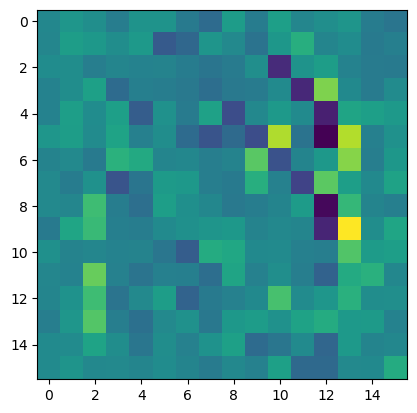

In [43]:
plt.imshow(un3_dn[5][1::2,1::2])

In [116]:
#def forward_bb():
bb = model.layer2[0]

In [110]:
len(bb.shortcut)

0

In [117]:
bb.shortcut

Sequential(
  (0): Conv2d(16, 32, kernel_size=(1, 1), stride=(2, 2), bias=False)
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
)

In [118]:
convl, bnl = bb.shortcut

In [9]:
from muxcnn.comparator import ApprRelu

뭔가 downsample이 되기는 함. 
근데 어느 채널이 어디서 어디로 가는지는 모르겠음 

shortcut도 BN(CONV(res3))임. 

CONV.weight = 1이 아니면, conv 계산을 해줘야함. 
conv 잘 됨. 

In [146]:
# 0~9 slot으로 굳이 모아야할까? 
print(multed[::64][:10],
      res_linear)

print(np.argmax(multed[::64][:10]),
      np.argmax(res_linear.detach().numpy()),
      np.argmax(res_softmax.detach().numpy()))

[ -9.26866253 -10.81576363  -3.103708    -2.90243047  -9.46088434
   4.32840621  -6.97467135  -3.56178458  -8.88420169  -7.56295177] tensor([[ -9.3005, -11.0586,  -2.9741,  -2.9179,  -9.3500,   4.1474,  -6.8721,
          -3.6999,  -8.9446,  -7.6901]], grad_fn=<AddmmBackward0>)
5 5 5
